### 1. Insert Sorting

In [23]:
# myList =input('Please input a list needing to be sorted')
# myList=[2,5,8,1,7,6]
import numpy as np
scale_size = 10
myList = np.random.randint(0,scale_size,scale_size)
print(myList)
listLen = len(myList)

def exchangeValue(listIn,id_i,id_j):
    '''Exchange values inside the list between given indexes'''
    temp  = listIn[id_i]
    listIn[id_i] = listIn[id_j]
    listIn[id_j] = temp
#exchangeValue(myList,0,1)

for i in range(1,listLen):
    j = i
    while j > 0:
        if myList[j] < myList[j-1]: # Ascending order
            exchangeValue(myList,j,j-1)
            j-=1
        else:
            j-=1
            break      
print(myList)

[1 4 7 2 6 5 9 7 8 5]
[1 2 4 5 5 6 7 7 8 9]


In [32]:
# This is a more concise version, the number of operations during each loop 
# can be reduced further from last version
scale_size_1 = 10
myList1 = np.random.randint(0,scale_size_1,scale_size_1)
#myList1 = [3, 1, 5, 0, 3]
print(myList1)
listLen = len(myList1)
for i in range(1,listLen):
    j = i
    tempVar = myList1[i]    
    while j > 0 and myList1[j-1] > tempVar: 
    #as long as a_j-1 > a_j (local descending order), exchange should happen
        myList1[j] = myList1[j-1]
        j-=1
    myList1[j] = tempVar
print(myList1)

[8 9 7 8 8 7 6 7 0 6]
[9 8 8 8 7 7 7 6 6 0]


### 2. Merge Sort

In [58]:
def mergeSort(myList):
    '''Sort list with ascending order using merging sort algorithm'''
    from math import floor as flr
    import numpy as np
    N =  len(myList)
    if N==1 :
        return myList
    else:
        # Divide into two parts
        subList_1 = myList[0:flr(N/2)]
        subList_2 = myList[flr(N/2):N]
        # Recursion to sort sublists
        mergeSort(subList_1)
        mergeSort(subList_2)
        # Merge two sublists
        pointer_1 = 0
        pointer_2 = 0
        max_max = max(subList_1[-1],subList_2[-1]) + 1.0
        for i in range(N):
            # set pointer for sublist 1
            if pointer_1 < len(subList_1):
                value_1 = subList_1[pointer_1]
            else:
                value_1 = max_max
            # set pointer for sublist 2
            if pointer_2 < len(subList_2):
                value_2 = subList_2[pointer_2]
            else:
                value_2 = max_max
            myList[i]=min(value_1,value_2)
            # Move pointer based on sorted sublists
            if value_1 < value_2:
                pointer_1+=1
            else:
                pointer_2+=1
        return myList

import numpy as np
scale_size_1 = 10
myList1 = list(np.random.randint(0,scale_size_1,scale_size_1))
#myList1 = [7,5,3,1,6,3,6,4,2,3]
print(myList1)
mergeSort(myList1)
print(myList1)

[1, 1, 3, 2, 8, 6, 4, 8, 0, 8]
[0, 1, 1, 2, 3, 4, 6, 8, 8, 8]


### Test performance of different sorting algorithms

In [13]:
#from SortAlgorithm import insertSort
#from SortAlgorithm import mergeSort
from SortAlgorithm.speedTest import insertTest
from SortAlgorithm.speedTest import mergeTest
#from SortAlgorithm.insertTest import insertTest
import numpy as np

import timeit
import time

scale_series = list(range(100,2100,100))
time_insert = np.zeros(len(scale_series))
time_merge = np.zeros(len(scale_series))
for k in range(len(scale_series)):
    scale_size = scale_series[k]
    # Run test for insert sorting
    tic =  time.time()
    for i in range(100): # Run for 100 times and then take average
        insertTest(scale_size)
    toc = time.time()
    time_insert[k]=(toc-tic)/100
    
    # Run test for merge sorting
    tic =  time.time()
    for i in range(100): # Run for 100 times and then take average
        mergeTest(scale_size)
    toc = time.time()
    time_merge[k]=(toc-tic)/100   
    #print('%20.18f' %(toc-tic))
print(time_merge)
print(time_insert)

[ 0.00162468  0.00287937  0.0040062   0.00517214  0.00657213  0.00812602
  0.00907971  0.01084786  0.01338243  0.01340089  0.01482233  0.01619569
  0.01787519  0.01927761  0.02048289  0.02215858  0.02384748  0.0249178
  0.02806215  0.02777061]
[ 0.00108776  0.00181906  0.00416278  0.00717639  0.01209062  0.01766654
  0.02454697  0.03268392  0.04207339  0.05547035  0.06385575  0.07708673
  0.09161643  0.10627411  0.1210436   0.14215069  0.15706369  0.17701285
  0.2007734   0.2171096 ]


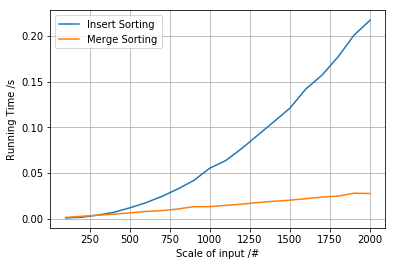

In [14]:
import matplotlib.pyplot as plt
line1, = plt.plot(scale_series,time_insert, label="Insert Sorting", linestyle='-')
line2, = plt.plot(scale_series,time_merge, label="Merge Sorting", linestyle='-')
# Create a legend for two lines
first_legend = plt.legend(handles=[line1, line2], loc=0)
plt.xlabel('Scale of input /#')
plt.ylabel('Running Time /s')
plt.grid(b=True)
plt.show()